In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_784.csv')

In [3]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.shape

(70000, 785)

In [5]:
X, y = df.drop(['class'], axis=1), df['class'].copy()

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
X.shape

(70000, 784)

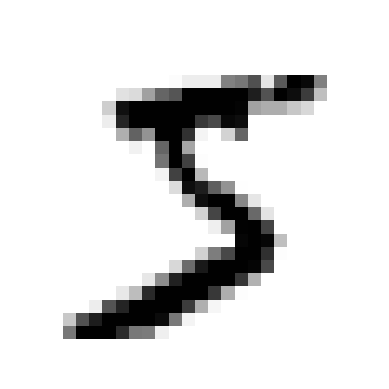

In [10]:
def digit_image(num_image):
    num_image_reshaped = num_image.reshape(28, 28)
    plt.imshow(num_image_reshaped, cmap='binary')
    plt.axis('off')

some_digit = X[0]
digit_image(some_digit)

In [11]:
y[0]

5

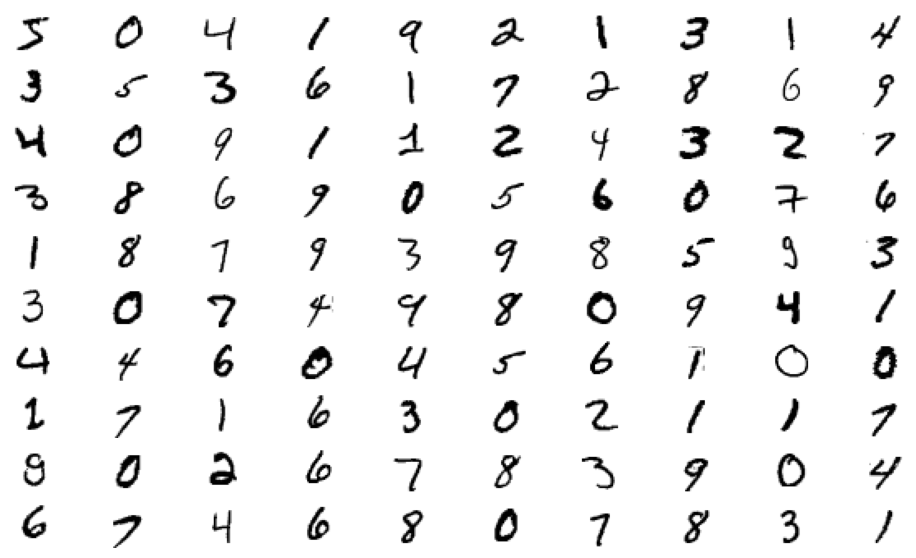

In [12]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(X[:100]):
    plt.subplot(10, 10, idx+1)
    digit_image(image)

In [13]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [22]:
sgd_clf = SGDClassifier(random_state=42)

In [23]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [27]:
# cross_val_score(sgd_clf, X_train, y_train_5, cv=3).mean()

0.9570333333333334

In [25]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [26]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [29]:
len(y_train)

60000

In [31]:
sum(y_train)

267236

In [32]:
sum(y_train == 5)

5421

In [33]:
len(y_train), sum(y_train_5)

(60000, 5421)

In [34]:
pd.DataFrame(y_train_5).value_counts()

False    54579
True      5421
Name: count, dtype: int64

In [36]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='f1')

array([0., 0., 0.])

In [38]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
preds

array([ True, False, False, ...,  True, False, False])

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [40]:
tit_df = pd.read_csv('Titanic-Dataset.csv')

In [41]:
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
tit_df.shape

(891, 12)

In [44]:
tit_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [54]:
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [55]:
tit_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [62]:
tit_df.dropna(subset='Age', inplace=True)

In [64]:
tit_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [65]:
tit_df.dropna(subset='Embarked', inplace=True)

In [66]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [67]:
tit_df['Age'] = tit_df['Age'].astype(int)

In [71]:
tit_df[tit_df['SibSp'] > 3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
16,0,3,male,2,4,1,29.1250,Q
50,0,3,male,7,4,1,39.6875,S
59,0,3,male,11,5,2,46.9000,S
68,1,3,female,17,4,2,7.9250,S
71,0,3,female,16,5,2,46.9000,S
119,0,3,female,2,4,2,31.2750,S
164,0,3,male,1,4,1,39.6875,S
171,0,3,male,4,4,1,29.1250,Q
182,0,3,male,9,4,2,31.3875,S
233,1,3,female,5,4,2,31.3875,S


In [72]:
if tit_df['Survived'].isna().sum() > 0:
    tit_df.dropna('Survived')

In [73]:
X = tit_df.drop(['Survived'], axis=1)
y = tit_df['Survived'].copy()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
num_features = X_train.select_dtypes(include=(np.number)).columns
cat_features = X_train.select_dtypes(exclude=(np.number)).columns

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [80]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('object', cat_pipeline, cat_features)
], remainder='passthrough')

estimator = RandomForestClassifier()

full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('estimator', estimator)
])

In [81]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('object',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('estimator', RandomForestClassifier())])

In [86]:
print(full_pipeline.score(X_train, y_train))

0.9876977152899824


In [87]:
print(full_pipeline.score(X_test, y_test))

0.7412587412587412
